### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [538]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [539]:
data = pd.read_csv('data/coupons.csv')
pd.set_option('future.no_silent_downcasting', True)

In [540]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [541]:
# Investigate the dataset for missing or problematic data.



# Examine unique values for categorical features to identify potential issues
for col in data:
  print(f"\nUnique values for column '{col}':")
  print(data[col].unique())




Unique values for column 'destination':
['No Urgent Place' 'Home' 'Work']

Unique values for column 'passanger':
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Unique values for column 'weather':
['Sunny' 'Rainy' 'Snowy']

Unique values for column 'temperature':
[55 80 30]

Unique values for column 'time':
['2PM' '10AM' '6PM' '7AM' '10PM']

Unique values for column 'coupon':
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

Unique values for column 'expiration':
['1d' '2h']

Unique values for column 'gender':
['Female' 'Male']

Unique values for column 'age':
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Unique values for column 'maritalStatus':
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

Unique values for column 'has_children':
[1 0]

Unique values for column 'education':
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School

In [542]:
mapping = {'$37500 - $49999': 37500,  '$62500 - $74999': 62500, '$12500 - $24999': 125000, '$75000 - $87499': 75000, '$50000 - $62499': 50000, '$25000 - $37499': 25000, '$100000 or More': 100000,'$87500 - $99999' : 87500, 'Less than $12500':12499}

data['income'] = data['income'].replace(mapping).infer_objects(copy=False)
data['income'].info()

#decided to replace all of the string values with numerical values to create easier comparisons

<class 'pandas.core.series.Series'>
RangeIndex: 12684 entries, 0 to 12683
Series name: income
Non-Null Count  Dtype
--------------  -----
12684 non-null  int64
dtypes: int64(1)
memory usage: 99.2 KB


3. Decide what to do about your missing data -- drop, replace, other...

In [543]:
mapping = {'21': 21, '46': 46, '26': 26, '31': 31, '41': 41, '50plus': 50, '36': 36, 'below21': 20}
data['age'] = data['age'].replace(mapping).infer_objects(copy=False)
data['age'].unique()

#replaced ages with numerical values

array([21, 46, 26, 31, 41, 50, 36, 20])

In [544]:

#replace the text values of the bar column with numerical values
mapping = {'never': 0, 'less1': 0, '1~3': 1, 'gt8': 8, np.nan: 0, '4~8': 4}
data['Bar'] = data['Bar'].replace(mapping).infer_objects(copy=False)
data['Bar'].unique()

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace(mapping).infer_objects(copy=False)
data['RestaurantLessThan20'].unique()

data['CoffeeHouse'] = data['CoffeeHouse'].replace(mapping).infer_objects(copy=False)
data['CoffeeHouse'].unique()

data['CarryAway'] = data['CarryAway'].replace(mapping).infer_objects(copy=False)
data['CarryAway'].unique()

data['Restaurant20To50'] = data['Restaurant20To50'].replace(mapping).infer_objects(copy=False)
data['Restaurant20To50'].unique()



array([1, 0, 8, 4])

4. What proportion of the total observations chose to accept the coupon?



Total Coupon Acceptance Rate: 56.84%


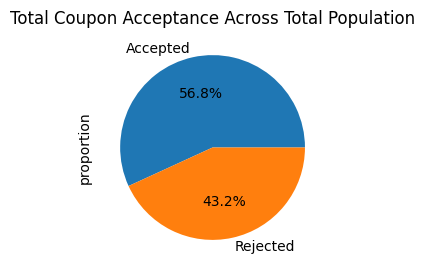

In [545]:
# prompt: What proportion of the total observations chose to accept the coupon?


acceptance_rate = data['Y'].value_counts(normalize=True)

saidyes = acceptance_rate[1] * 100
saidyes
print(f"Total Coupon Acceptance Rate: {saidyes:.2f}%")


plt.figure(figsize=(6, 3))
acceptance_rate.plot(labels=["Accepted", "Rejected"], kind="pie", autopct='%1.1f%%')\
        .set_title("Total Coupon Acceptance Across Total Population");



In [547]:
#looked at the occupations of the drivers that accepted the coupons

occupation_acceptance = data.groupby('occupation')['Y'].value_counts(normalize=True).unstack()

occupation_acceptance[0] = occupation_acceptance[0] * 100
occupation_acceptance[1] = occupation_acceptance[1] * 100
# Sort the DataFrame by occupation_acceptance[1] in descending order and get the top rows
top_occupations = occupation_acceptance.sort_values(by=1, ascending=False).head(10)

# Create the bar plot using plotly.express
fig = px.bar(top_occupations,
             x=top_occupations.index,
             y=[1,0],
             title='Top Occupations with the Highest  Coupon Acceptance Rates',
             labels={'x': 'Occupation', 'y': 'Acceptance Rate (%)'})
fig.show()

In [548]:
#looked at the occupations of the drivers that accepted the coupons
TimeAcceptance = data.groupby('time')['Y'].value_counts(normalize=True).unstack()

TimeAcceptance[0] = TimeAcceptance[0] * 100
TimeAcceptance[1] = TimeAcceptance[1] * 100
# Sort the DataFrame by occupation_acceptance[1] in descending order and get the top rows
top_TimeAcceptance = TimeAcceptance.sort_values(by=1, ascending=False).head(10)

# Create the bar plot using plotly.express
fig = px.bar(top_TimeAcceptance,
             x=top_TimeAcceptance.index,
             y=[1],
             title='Top Times during the day Highest Coupon Acceptance Rates',
             labels={'x': 'Time', 'y': 'Acceptance Rate (%)'})
fig.show()

5. Use a bar plot to visualize the `coupon` column.

In [549]:
px.bar(data, x='coupon', title='Coupon Distribution')
#from the bar chart -> most people used and accepted the Coffee House Coupon

6. Use a histogram to visualize the temperature column.

In [551]:
px.histogram(data, x='temperature', title='Temperature Distribution')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [552]:
bar_coupons = data[data['coupon'] == 'Bar']


2. What proportion of bar coupons were accepted?


Bar Coupon Acceptance Rate: 41.00%


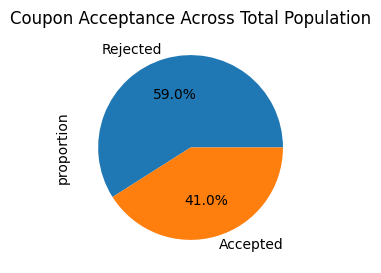

In [553]:
acceptance_rate = bar_coupons['Y'].value_counts(normalize=True)
acceptance_rate_saidyes = acceptance_rate[1] * 100

print(f"Bar Coupon Acceptance Rate: {acceptance_rate_saidyes:.2f}%")

plt.figure(figsize=(6, 3))
acceptance_rate.plot(labels=["Rejected", "Accepted"], kind="pie", autopct='%1.1f%%')\
        .set_title("Coupon Acceptance Across Total Population");



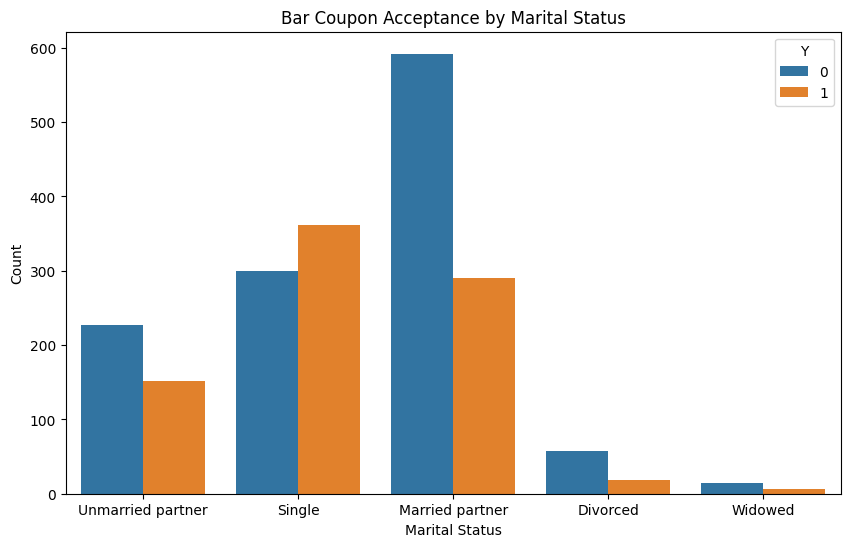

In [554]:

plt.figure(figsize=(10, 6))
sns.countplot(x='maritalStatus', hue='Y', data=bar_coupons)
plt.title('Bar Coupon Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

#it seems single people are more likely to use bar coupons

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [555]:
lessthan3 = bar_coupons[bar_coupons['Bar'] < 4] # 3 or fewer
morethan3 = bar_coupons[bar_coupons['Bar'] >= 4] #4 and greater

lessthan3_acceptance_rate = lessthan3['Y'].value_counts(normalize=True)
morethan3_acceptance_rate = morethan3['Y'].value_counts(normalize=True)

lessthan3_acceptance_rate_saidyes = lessthan3_acceptance_rate[1] * 100
morethan3_acceptance_rate_saidyes = morethan3_acceptance_rate[1] * 100

print(f"Acceptance Rate for Less than 3: {lessthan3_acceptance_rate_saidyes:.2f}%")
print(f"Acceptance Rate for More than 3: {morethan3_acceptance_rate_saidyes:.2f}%")


Acceptance Rate for Less than 3: 37.07%
Acceptance Rate for More than 3: 76.88%


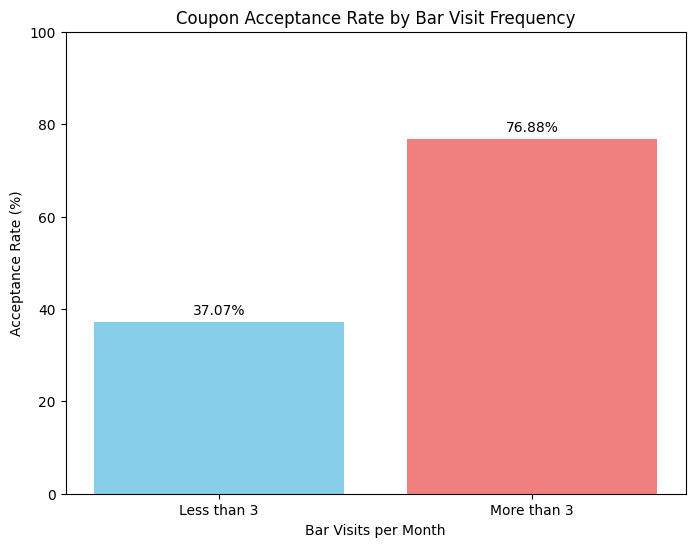

In [556]:
# Create the plot -> this bar chart can be used to better visualize the comparisons between low frequent bar visits and high frequent bar visits
categories = ['Less than 3', 'More than 3']
acceptance_rates = [lessthan3_acceptance_rate_saidyes, morethan3_acceptance_rate_saidyes]

plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.xlabel('Bar Visits per Month')
plt.ylabel('Acceptance Rate (%)')
plt.title('Coupon Acceptance Rate by Bar Visit Frequency')
plt.ylim(0, 100)  # Set y-axis limit to 100%
for i, rate in enumerate(acceptance_rates):
  plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', va='bottom') # Add percentage labels above bars
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [557]:
morethan1andover25 = bar_coupons[(bar_coupons['Bar'] >= 1) & (bar_coupons['age'] > 25)]
morethan1andover25_acceptance_rate = morethan1andover25['Y'].value_counts(normalize=True)
morethan1andover25_acceptance_rate_saidyes = morethan1andover25_acceptance_rate[1] * 100
morethan1andover25_acceptance_rate_saidyes

other_drivers = bar_coupons[~((bar_coupons['Bar'] >= 1) & (bar_coupons['age'] > 25))]
other_drivers_acceptance_rate = other_drivers['Y'].value_counts(normalize=True)
other_drivers_acceptance_rate_saidyes = other_drivers_acceptance_rate[1] * 100



(morethan1andover25_acceptance_rate_saidyes,other_drivers_acceptance_rate_saidyes)
print(f"Acceptance Rate for More than 1 Visit and Over 25 Years of age: {morethan1andover25_acceptance_rate_saidyes:.2f}%")
print(f"Acceptance Rate for Other Drivers: {other_drivers_acceptance_rate_saidyes:.2f}%")


Acceptance Rate for More than 1 Visit and Over 25 Years of age: 69.52%
Acceptance Rate for Other Drivers: 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [558]:
morethan1passengernotkidsandnotfarmingfishingforestry = bar_coupons[(bar_coupons['Bar'] >= 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['occupation'] != 'Farming Fishing And Forestry')]
morethan1passengernotkidsandnotfarmingfishingforestry_acceptance_rate = morethan1passengernotkidsandnotfarmingfishingforestry['Y'].value_counts(normalize=True)
morethan1passengernotkidsandnotfarmingfishingforestry_acceptance_rate_saidyes = morethan1passengernotkidsandnotfarmingfishingforestry_acceptance_rate[1] * 100
morethan1passengernotkidsandnotfarmingfishingforestry_acceptance_rate_saidyes

other_drivers = bar_coupons[~((bar_coupons['Bar'] >= 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['occupation'] != 'Farming Fishing And Forestry'))]
other_drivers_acceptance_rate = other_drivers['Y'].value_counts(normalize=True)

other_drivers_acceptance_rate_saidyes = other_drivers_acceptance_rate[1] * 100

(morethan1passengernotkidsandnotfarmingfishingforestry_acceptance_rate_saidyes, other_drivers_acceptance_rate_saidyes)
print(f"Acceptance Rate for More than 1 Visit and No Kids and Occupation is not Farming, Fish, or Forestry: {morethan1passengernotkidsandnotfarmingfishingforestry_acceptance_rate_saidyes:.2f}%")
print(f"Acceptance Rate for Other Drivers: {other_drivers_acceptance_rate_saidyes:.2f}%")

Acceptance Rate for More than 1 Visit and No Kids and Occupation is not Farming, Fish, or Forestry: 71.32%
Acceptance Rate for Other Drivers: 29.60%


In [560]:
#Regarding occupation, wanted to find out the top occupations that increase the acceptance rate of bar coupons.

occupation_acceptance = bar_coupons.groupby('occupation')['Y'].value_counts(normalize=True).unstack()

occupation_acceptance[0] = occupation_acceptance[0] * 100
occupation_acceptance[1] = occupation_acceptance[1] * 100
# Sort the DataFrame by occupation_acceptance[1] in descending order and get the top rows
top_occupations = occupation_acceptance.sort_values(by=1, ascending=False).head(10)

# Create the bar plot using plotly.express
fig = px.bar(top_occupations,
             x=top_occupations.index,
             y=[1,0],
             title='Top Occupations with the Highest Bar Coupon Acceptance Rates',
             labels={'x': 'Occupation', 'y': 'Acceptance Rate (%)'})
fig.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [561]:
# prompt: Compare the acceptance rates between those drivers who:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# go to bars more than once a month and are under the age of 30 OR
# go to cheap restaurants more than 4 times a month and income is less than 50K.


group1 = bar_coupons[((bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed')) | ((bar_coupons['Bar'] > 1) & (bar_coupons['age'] < 30)) | ((bar_coupons['RestaurantLessThan20'] >= 4) & (bar_coupons['income'] < 50000))]
group1_acceptance_rate = group1['Y'].value_counts(normalize=True)
group1_acceptance_rate_yes = group1_acceptance_rate[1] * 100

group2 = bar_coupons[~(((bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed')) | ((bar_coupons['Bar'] > 1) & (bar_coupons['age'] < 30)) | ((bar_coupons['RestaurantLessThan20'] >= 4) & (bar_coupons['income'] < 50000)))]
group2_acceptance_rate = group2['Y'].value_counts(normalize=True)
group2_acceptance_rate_yes = group2_acceptance_rate[1] * 100

print(f"Group 1 Acceptance Rate: {group1_acceptance_rate_yes:.2f}%")
print(f"Group 2 Acceptance Rate: {group2_acceptance_rate_yes:.2f}%")

Group 1 Acceptance Rate: 56.96%
Group 2 Acceptance Rate: 37.11%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [562]:
# Drivers who accepted bar coupons appear to share several characteristics:


# 1. Frequency of Bar Visits:  Those who frequent bars (more than 3 times a month) demonstrate a higher acceptance rate for bar coupons compared to infrequent bar-goers.

# 2. Age and Frequency of Bar Visits:  Drivers aged 25 and above who visit bars more than once a month show a higher likelihood of accepting the coupons.

# 3. Passengers and Occupation:  The combination of frequent bar visits, passengers other than children, and occupations outside of farming, fishing, or forestry correlates with higher acceptance rates. Architecture and Engineering, Production Occupations, and Healthcare Support are more likely to use their bar coupons.

# 4. Other factors
#    - High Frequent Bar Visits (more than once a month) combined with lack of children OR being under 30 years old.
#    - Frequent visits to inexpensive restaurants (4+ times/month) and a lower income (<$50,000) also contribute to coupon acceptance.

# Hypothesis:  Drivers who accept bar coupons tend to be regular bar patrons, often with companions that don't include children, and with a specific occupation other than farming, forestry.  Bar-goes who are young and go frequently are also more likely to use the Bar Coupons.  And those patrons with lower income who frequent cheaper restaurant visits are more inclined to accept Bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [563]:
#Create a new DataFrame that contains just the coffee coupons.

In [564]:
coffee_coupons = data[data['coupon'] == 'Coffee House']


In [521]:
#What proportion of coffee coupons were accepted?

Coffee Coupon Acceptance Rate: 49.92%


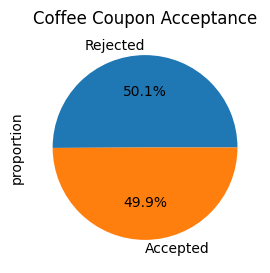

In [566]:
coffee_coupons_Acceptance = coffee_coupons['Y'].value_counts(normalize=True)
coffee_coupons_Acceptance[1] = coffee_coupons_Acceptance[1] * 100
coffee_coupons_Acceptance[0] = coffee_coupons_Acceptance[0] * 100

print(f"Coffee Coupon Acceptance Rate: {coffee_coupons_Acceptance[1]:.2f}%")

plt.figure(figsize=(6, 3))
coffee_coupons_Acceptance.plot(labels=["Rejected", "Accepted"], kind="pie", autopct='%1.1f%%')\
        .set_title("Coffee Coupon Acceptance");


In [523]:
#Compare the acceptance rate between those who went to a coffe house 3 or fewer times a month to those who went more.

In [567]:
coffee_coupons_lessthan3 = coffee_coupons[coffee_coupons['CoffeeHouse'] < 4]
coffee_coupons_morethan3 = coffee_coupons[coffee_coupons['CoffeeHouse'] >= 4]

cofffecount_lessthan3_rate = coffee_coupons_lessthan3['Y'].value_counts(normalize=True)
cofffecount_morethan3_rate = coffee_coupons_morethan3['Y'].value_counts(normalize=True)

coffeecount_lessthan3_saidyes = cofffecount_lessthan3_rate[1] * 100
coffeecount_morethan3_saidyes = cofffecount_morethan3_rate[1] * 100

(coffeecount_lessthan3_saidyes,coffeecount_morethan3_saidyes)
print(f"Coffee House Less than 3 visits Acceptance Rate: {coffeecount_lessthan3_saidyes:.2f}%")
print(f"Coffee House More than 3 visits Acceptance Rate: {coffeecount_morethan3_saidyes:.2f}%")


Coffee House Less than 3 visits Acceptance Rate: 44.96%
Coffee House More than 3 visits Acceptance Rate: 67.50%


In [525]:
#Compare the acceptance rate between drivers who go to a coffee house more than once a month and younger than 40 versus  all others.

In [568]:
youngerthan40 = coffee_coupons[(coffee_coupons['CoffeeHouse'] >= 1) & (coffee_coupons['age'] <= 40)]
youngerthan40_rate = youngerthan40['Y'].value_counts(normalize=True)
youngerthan40_saidyes = youngerthan40_rate[1] * 100


#versus others
othercoffee = coffee_coupons[~((coffee_coupons['CoffeeHouse'] >= 1) & (coffee_coupons['age'] <= 40))]
othercoffee_rate = othercoffee['Y'].value_counts(normalize=True)
othercoffee_rate_saidyes = othercoffee_rate[1] * 100

(youngerthan40_saidyes,othercoffee_rate_saidyes)
print(f"Coffee House More than 1 visit and Younger than 40 Acceptance Rate: {youngerthan40_saidyes:.2f}%")
print(f"Coffee House Other Acceptance Rate: {othercoffee_rate_saidyes:.2f}%")
#it seems that frequent coffee drinkers who are younger will use the Coffee Coupon vs everyone else.

Coffee House More than 1 visit and Younger than 40 Acceptance Rate: 66.71%
Coffee House Other Acceptance Rate: 40.45%


In [569]:
youngerthan40justage = coffee_coupons[coffee_coupons['age'] <= 40]
youngerthan40_rate = youngerthan40justage['Y'].value_counts(normalize=True)
youngerthan40_saidyes = youngerthan40_rate[1] * 100


#versus others
othercoffee = coffee_coupons[coffee_coupons['age'] > 40]
othercoffee_rate = othercoffee['Y'].value_counts(normalize=True)
othercoffee_rate_saidyes = othercoffee_rate[1] * 100

(youngerthan40_saidyes,othercoffee_rate_saidyes)
print(f"Coffee House Younger than 40 Acceptance Rate: {youngerthan40_saidyes:.2f}%")
print(f"Coffee House Other Acceptance Rate: {othercoffee_rate_saidyes:.2f}%")

#regardless of frequency of visits, younger drinkers are more likely to use the coffee coupon

Coffee House Younger than 40 Acceptance Rate: 51.27%
Coffee House Other Acceptance Rate: 46.33%


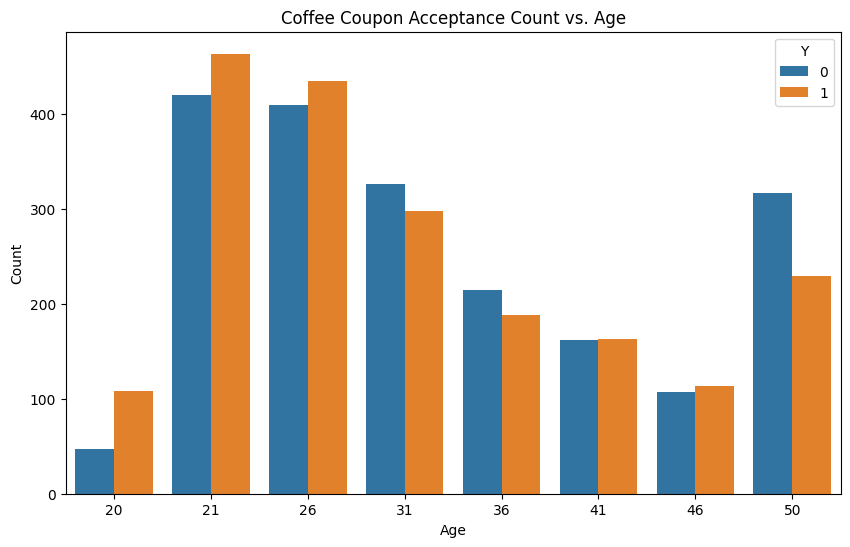

In [528]:


# Plotting the acceptance counts against age -> here you can visually see the acceptance rate.  If the gap is bigger than 0 and 1 Bars than we can theorize a certain age group might have a higher acceptance rate
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='Y', data=coffee_coupons)
plt.title('Coffee Coupon Acceptance Count vs. Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

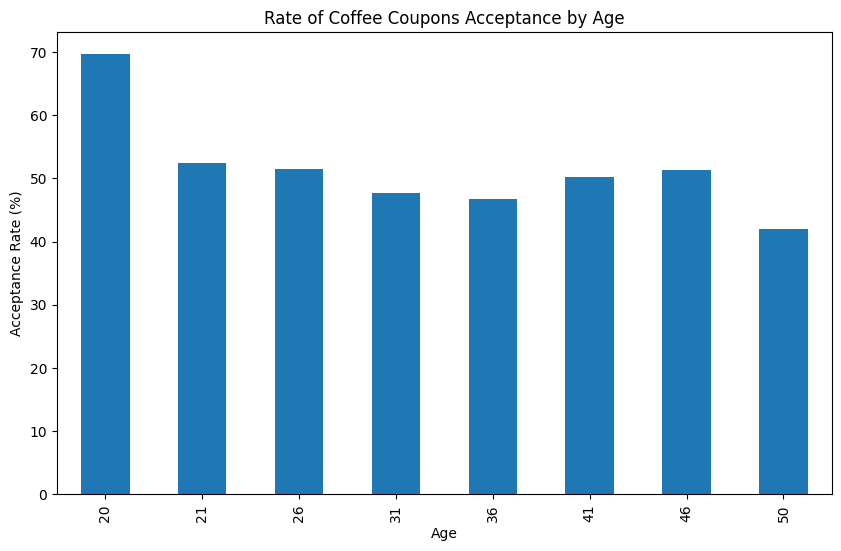

In [575]:

# Calculate the proportion of Y == 1 for each age group
age_acceptance_rate = coffee_coupons.groupby('age')['Y'].value_counts(normalize=True).unstack()

# Convert to percentage
age_acceptance_rate[1] = age_acceptance_rate[1] * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
age_acceptance_rate[1].plot(kind='bar')
plt.title('Rate of Coffee Coupons Acceptance by Age')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate (%)')
plt.show()

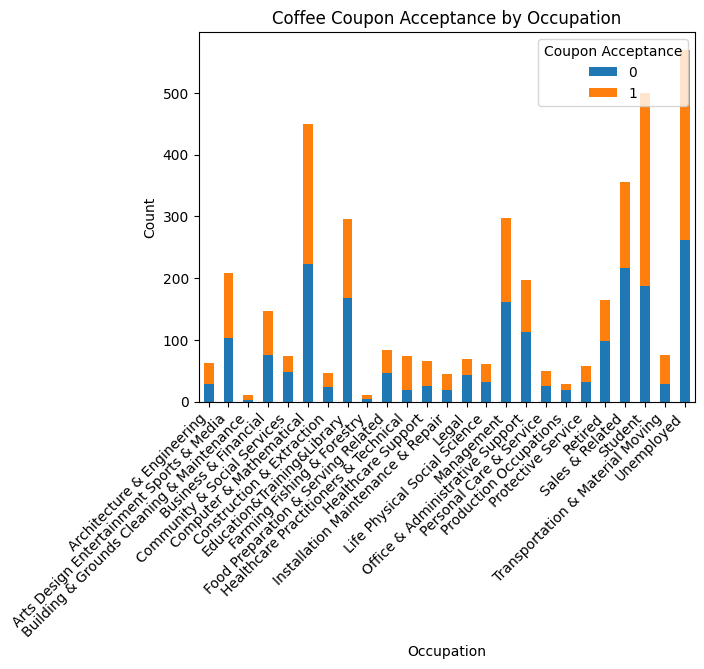

In [529]:


occupationacceptance = coffee_coupons.groupby('occupation')['Y'].value_counts()

# The graph shows which occupations have a higher acceptance rate.  A bigger orange block to blue block will indicate that occupation might have a higher acceptance rate.

occupationacceptance.unstack().plot(kind='bar', stacked=True)
plt.title('Coffee Coupon Acceptance by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coupon Acceptance', loc='upper right')

plt.show()

In [530]:
#Compare the acceptance rate between drivers who are students

In [576]:
students = coffee_coupons[(coffee_coupons['occupation'] == 'Student') ]
students_rate = students['Y'].value_counts(normalize=True)
students_saidyes = students_rate[1] * 100


everyoneelse = coffee_coupons[coffee_coupons['occupation'] != 'Student']
everyoneelse_rate = everyoneelse['Y'].value_counts(normalize=True)
everyoneelse_saidyes = everyoneelse_rate[1] * 100
(students_saidyes,everyoneelse_saidyes)

print(f"Students Acceptance Rate: {students_saidyes:.2f}%")
print(f"Everyone Else Acceptance Rate: {everyoneelse_saidyes:.2f}%")

Students Acceptance Rate: 62.53%
Everyone Else Acceptance Rate: 48.13%


In [532]:
#Compare the acceptance rate between drivers who visited coffee houses more than once, are younger than 40 and are students to everyone else


In [533]:
studentsfrequentyoung = coffee_coupons[(coffee_coupons['CoffeeHouse'] >= 1) & (coffee_coupons['age'] <= 40) & (coffee_coupons['occupation'] == 'Student')]
studentsfrequentyoung_rate = studentsfrequentyoung['Y'].value_counts(normalize=True)
studentsfrequentyoung_saidyes = studentsfrequentyoung_rate[1] * 100
studentsfrequentyoung_rate

everyoneelse2 = coffee_coupons[~((coffee_coupons['CoffeeHouse'] >= 1) & (coffee_coupons['age'] <= 40) & (coffee_coupons['occupation'] == 'Student'))]
everyoneelse2_rate = everyoneelse2['Y'].value_counts(normalize=True)
everyoneelse2_saidyes = everyoneelse2_rate[1] * 100
(studentsfrequentyoung_saidyes,everyoneelse2_saidyes)

print(f"Students with higher visit frequency rate and Younger Age Acceptance Rate: {studentsfrequentyoung_saidyes:.2f}%")
print(f"Everyone Else Acceptance Rate: {everyoneelse2_saidyes:.2f}%")


Students with higher visit frequency rate and Younger Age Acceptance Rate: 69.26%
Everyone Else Acceptance Rate: 48.30%


In [534]:
#compare the acceptance rate between drivers who are in the healthcare field versus Student

In [535]:
healthcare = coffee_coupons[(coffee_coupons['occupation'] == 'Healthcare Support') | (coffee_coupons['occupation'] == 'Healthcare Practitioners & Technical') ]
healthcare_rate = healthcare['Y'].value_counts(normalize=True)
healthcare_saidyes = healthcare_rate[1] * 100

other = coffee_coupons[~((coffee_coupons['occupation'] == 'Healthcare Support') | (coffee_coupons['occupation'] == 'Healthcare Practitioners & Technical') )]

other_rate = other['Y'].value_counts(normalize=True)
other_saidyes = other_rate[1] * 100

(students_saidyes, healthcare_saidyes, other_saidyes)
print(f"Students Acceptance Rate: {students_saidyes:.2f}%")
print(f"Healthcare Support and Technical Acceptance Rate: {healthcare_saidyes:.2f}%")
print(f"Other Acceptance Rate: {other_saidyes:.2f}%")

#healthcare industry also more likely to accept Coffee Coupons, higher rate than Students

Students Acceptance Rate: 62.53%
Healthcare Support and Technical Acceptance Rate: 68.35%
Other Acceptance Rate: 49.26%


In [536]:
occupation_acceptance_coffee = coffee_coupons.groupby('occupation')['Y'].value_counts(normalize=True).unstack()

occupation_acceptance_coffee[0] = occupation_acceptance_coffee[0] * 100
occupation_acceptance_coffee[1] = occupation_acceptance_coffee[1] * 100
# Sort the DataFrame by occupation_acceptance[1] in descending order and get the top rows
top_occupations_coffee = occupation_acceptance_coffee.sort_values(by=1, ascending=False).head(10)

# Create the bar plot using plotly.express
fig = px.bar(top_occupations_coffee,
             x=top_occupations_coffee.index,
             y=[1,0],
             title='Top Occupations with the Highest Coffee Coupon Acceptance Rates',
             labels={'x': 'Occupation', 'y': 'Acceptance Rate (%)'})
fig.show()

In [577]:
#FINDINGS and HYPOTHESIS

#Based on the analysis of the `coffee_coupons` data, drivers who accepted the Coffee House coupons appear to be younger (under 40), with students and those in healthcare showing a particularly high acceptance rate.
#While frequent coffee house visits (more than 3 times a month) correlate with higher acceptance, the age factor seems affect the acceptance rate more.
#In other words, youth, regardless of how often they visit coffee houses, is a key predictor of coupon acceptance, followed by occupation (building & grounds cleaning maintenance and students and healthcare workers, and Transportation) are among the top 5 professions to use the coffee coupons.


In [ ]:


# Further analysis recommendations for analyzing coupons and general improvements:

# 1.  Income and Coffee Coupon Acceptance:
#     - Investigate the relationship between income levels and coffee coupon acceptance.  Create visualizations (histograms, box plots) to see if there's a correlation.
#     -  Compare acceptance rates for different income brackets.


# 2.  Combine Multiple Factors:
#     -  Instead of analyzing factors in isolation, create more complex group comparisons.  For instance:
#     - Young students who visit coffee shops frequently.
#     -  Middle-aged healthcare workers with high income visiting coffee shops less often.

# 3.  Time-Based Analysis (If Available):
#      - If you have timestamps for coupon usage, analyze acceptance rates over time (day of the week, time of day, month).
#      - Are there specific times when people are more or less likely to use coffee coupons?


# 5.  Data Cleaning and Handling Duplicate Values:
#     - Check for Duplicate Values

#